In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import parallel_coordinates

In [2]:
df = pd.read_csv("data.csv")
df.rename(columns=lambda x: x[0].lower() + x.strip().lower().replace(' ', '_')[1:], inplace=True)
df = df.convert_dtypes()
df

,2025_rank,2024_rank,institution_name,location,location_full,size,academic_reputation,employer_reputation,faculty_student,citations_per_faculty,international_faculty,international_students,international_research_network,employment_outcomes,sustainability,qs_overall_score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,1401+,1201-1400,University of Montana Missoula,US,United States,M,3.0,2.2,10.6,6.1,1.3,1.9,6.5,3.1,1.0,-
1499,1401+,1401+,University of Oradea,RO,Romania,L,5.6,2.2,4.0,1.9,1.5,5.2,34.5,6.2,2.3,-
1500,1401+,1201-1400,University of San Carlos,PH,Philippines,M,7.2,9.4,3.3,1.8,2.1,2.1,6.4,9.6,1.0,-
1501,1401+,1401+,"University Politehnica of Timisoara, UPT",RO,Romania,L,4.1,4.2,7.2,3.9,1.4,2.5,18.6,3.9,1.1,-


Get a sense of the size and dimensions of the dataframe.

In [3]:
print(len(df))
print(len(df.columns))

1503
16


Looks at the DF types, for potential analyses.

In [4]:
print(df.dtypes)

2025_rank                         string[python]
2024_rank                         string[python]
institution_name                  string[python]
location                          string[python]
location_full                     string[python]
size                              string[python]
academic_reputation                      Float64
employer_reputation                      Float64
faculty_student                          Float64
citations_per_faculty                    Float64
international_faculty                    Float64
international_students                   Float64
international_research_network           Float64
employment_outcomes                      Float64
sustainability                           Float64
qs_overall_score                  string[python]
dtype: object


Descriptive statistics for dataset.

In [5]:
df.describe()

,academic_reputation,employer_reputation,faculty_student,citations_per_faculty,international_faculty,international_students,international_research_network,employment_outcomes,sustainability
count,1503.0,1503.0,1503.0,1503.0,1403.0,1445.0,1502.0,1503.0,1484.0
mean,20.28656,19.786693,28.128676,23.50346,30.725374,25.580346,50.129095,23.825083,24.309299
std,22.32623,23.784986,27.613017,27.870692,34.328935,31.098689,29.866588,27.351315,31.074718
min,1.3,1.1,1.0,1.0,1.0,1.0,1.0,1.2,1.0
25%,6.3,4.3,7.3,2.8,4.2,2.9,22.725,4.0,1.3
50%,11.0,9.4,16.0,9.9,12.5,9.6,51.1,11.8,6.75
75%,23.5,25.3,40.4,36.4,51.6,38.3,77.1,33.4,39.5
max,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


Lets say this person is similar to me in that they would like to select a school that offers lots of research opportunities, faculty relationships, and a diverse student faculty population. However, their parents are more concerned with their long term career prospects after college.  

Some potential questions one could ask with these priorities are: 
What characteristics of a university produce stronger career outcomes? 
How does size influence access to research opportunities, faculty relationships, and a diverse student faculty population?


Initially it will be useful to look at some of the relationships between some of the more over arching indicators of college quality. We can first determine the distribution of top ranked global universities.

In [6]:
#filter df for top 100 ranked universities
top_100 = df.sort_values(by='2025_rank', ascending=False)
top_100 = df[0:100]

/tmp/ipykernel_10050/211135405.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=top_100, y='location_full', order=top_100.location_full.value_counts().index, palette=palette);


Text(0, 0.5, 'Number of Top Ranked Universities')

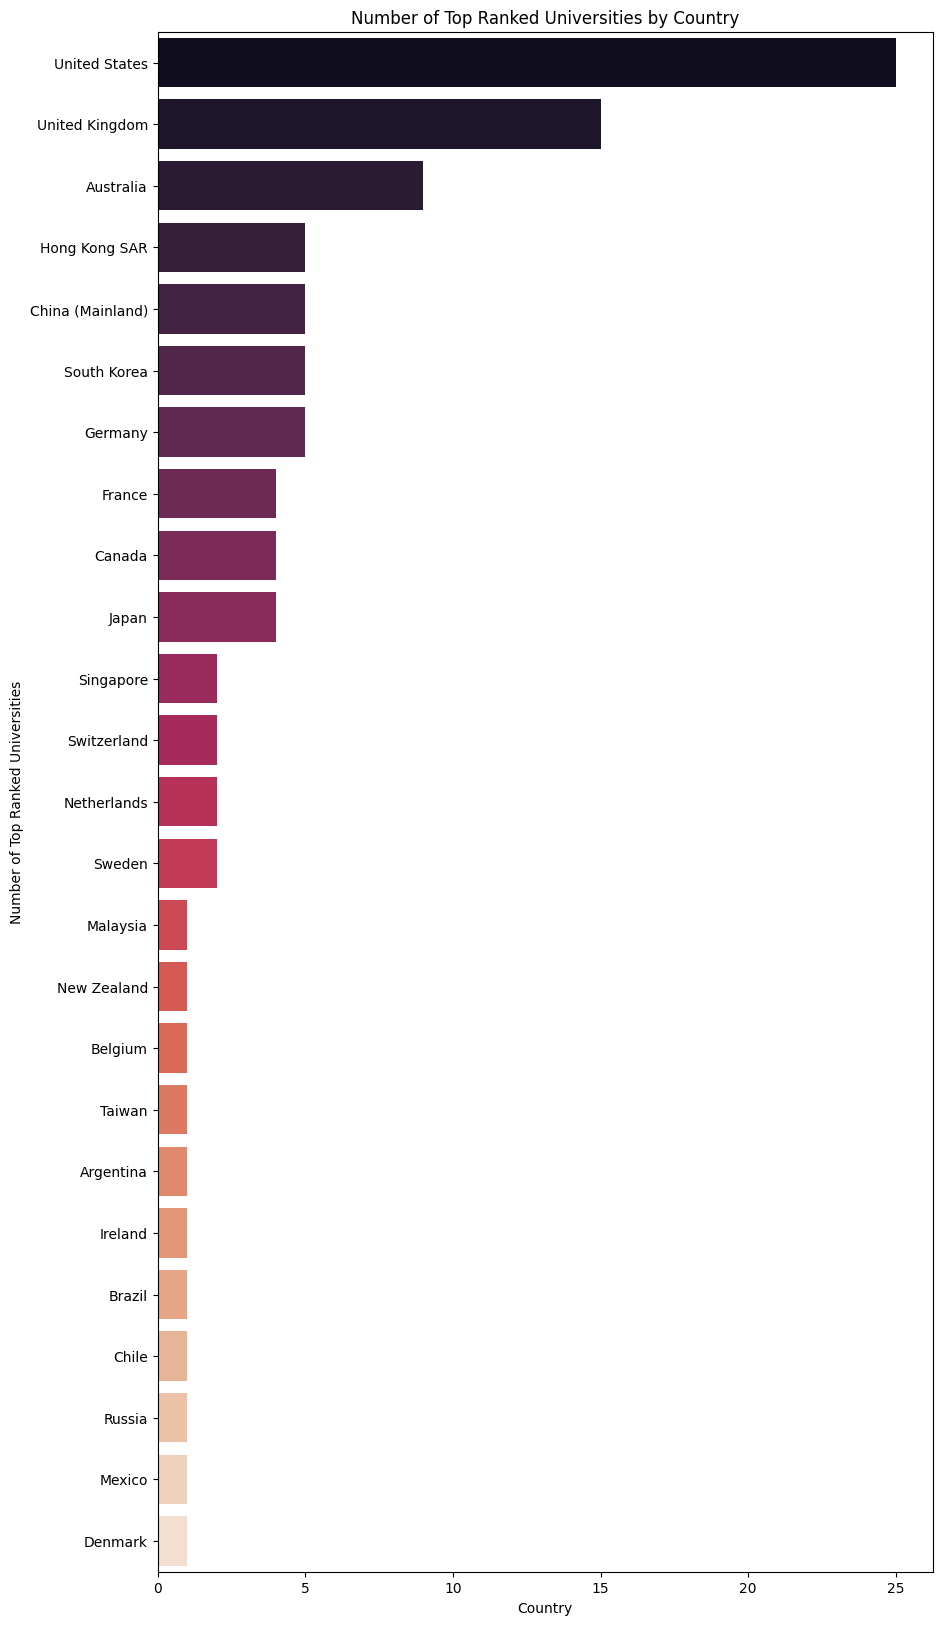

In [7]:
#fix size so labels are readable
fig, ax = plt.subplots(figsize=(10,20))

#color palette
palette = sns.color_palette("rocket", 25)

#plot a count of universities from each country
sns.countplot(data=top_100, y='location_full', order=top_100.location_full.value_counts().index, palette=palette);

#title and axis labels
plt.title("Number of Top Ranked Universities by Country")
plt.xlabel("Country")
plt.ylabel("Number of Top Ranked Universities")

We can create a correlation matrix of the variables of interest to determine what variable pairings may have strong correlations. 

In [8]:
#define columns of interest
cols = ['academic_reputation','employer_reputation','faculty_student','citations_per_faculty','international_faculty','international_students','international_research_network','employment_outcomes','sustainability','qs_overall_score']
df_corr = df[cols]
df_corr_copy = df_corr

#remove nas and convert to float to create corr matrix
for col in cols:
    df_corr[col] = pd.to_numeric(df[col].replace('-', np.nan), errors='coerce')
df_corr_num = df_corr.dropna()

/tmp/ipykernel_10050/4171920185.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[col] = pd.to_numeric(df[col].replace('-', np.nan), errors='coerce')
/tmp/ipykernel_10050/4171920185.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[col] = pd.to_numeric(df[col].replace('-', np.nan), errors='coerce')
/tmp/ipykernel_10050/4171920185.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

Text(0.5, 1.0, 'Correlation Matrix of Numerical Variables')

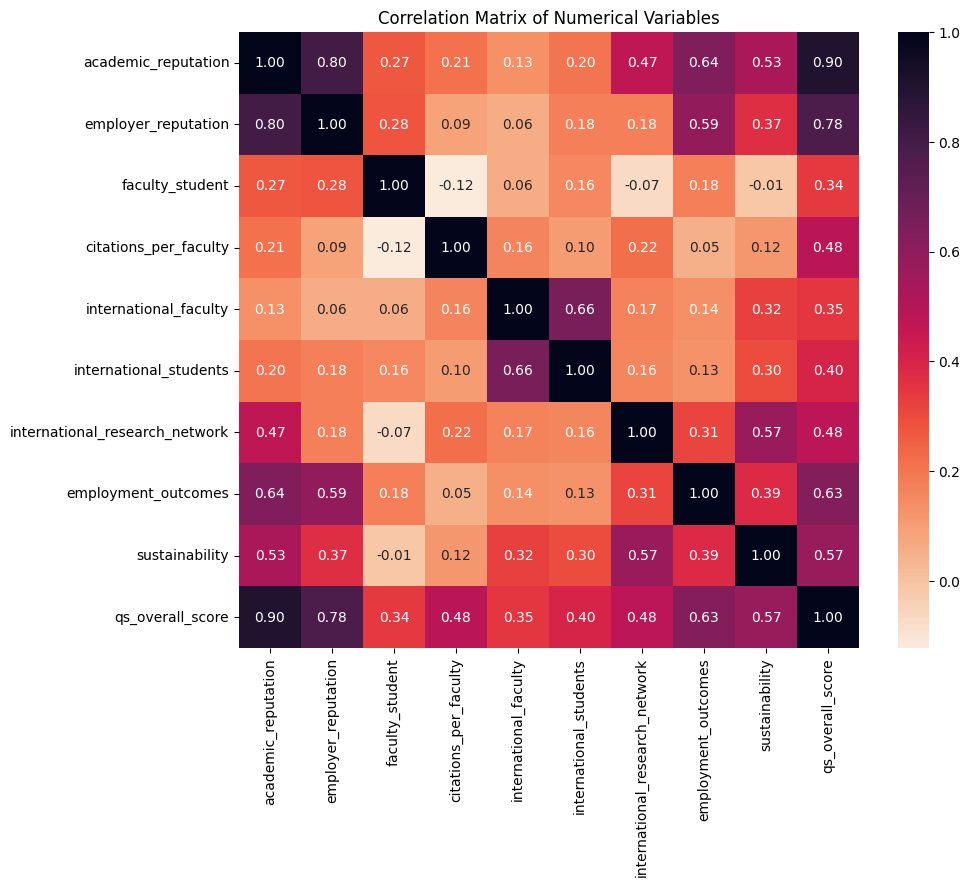

In [9]:
#new df for corrs
df_no_nas = df_corr_num[cols].corr()

#plot corr matrix
#update color palette to be reverse rocket for more color range
plt.figure(figsize=(10, 8))
sns.heatmap(df_no_nas, cmap='rocket_r', annot=True, fmt=".2f") 

#title
plt.title("Correlation Matrix of Numerical Variables")

A few things that I find interesting from this are - 
1. international research network does not correlate strongly with international faculty and students
2. sustainability seems to be strongly correlated with a lot of variables, but particularly academic repuation and international research network. 
3. Faculty student ration is negatively correlated with international research networks and citations per faculty.

With reference to the ideals of the parents of this student, we can see that a few variables relevant to career outcomes might be good indicators of potential college matches. 

Potential correlates - employer rep x qs overall, employer rep x employment, outployment outcomes x qs overall, employment outcomes x academic reputation.

Based on this we can explore what variables might be correlated with career outcomes. To do so I will produce LRMs.

Text(0.5, 1.0, 'Linear Regression of Employment Outcomes and Overall Score')

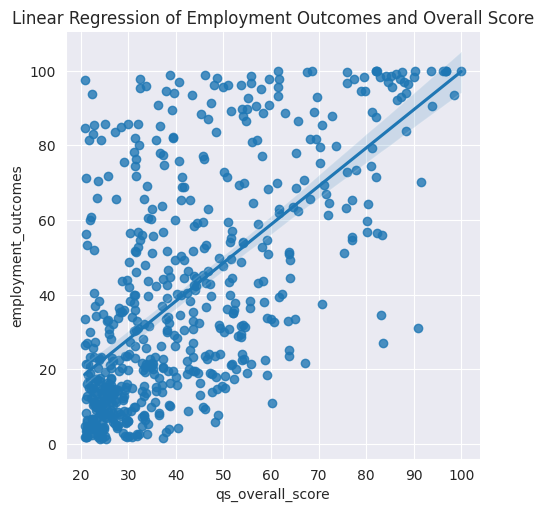

In [37]:
sns.lmplot(data=df_corr_num, x="qs_overall_score", y="employment_outcomes")

plt.title("Linear Regression of Employment Outcomes and Overall Score")

Text(0.5, 1.0, 'Linear Regression of Employer Reputation and Overall Score')

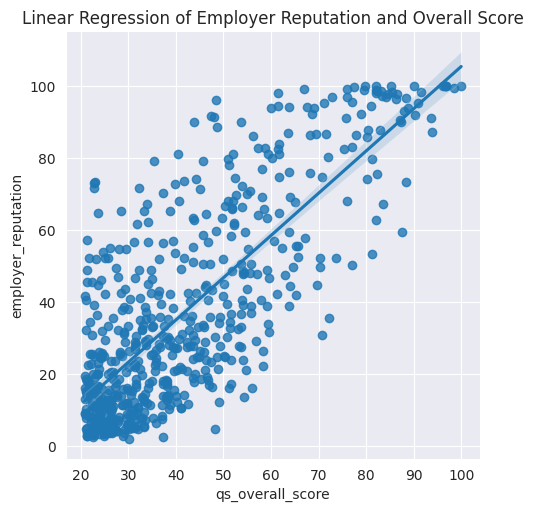

In [38]:
sns.lmplot(data=df_corr_num, x="qs_overall_score", y="employer_reputation")

plt.title("Linear Regression of Employer Reputation and Overall Score")

Text(0.5, 1.0, 'Linear Regression of Employment Outcomes and Academic Reputation')

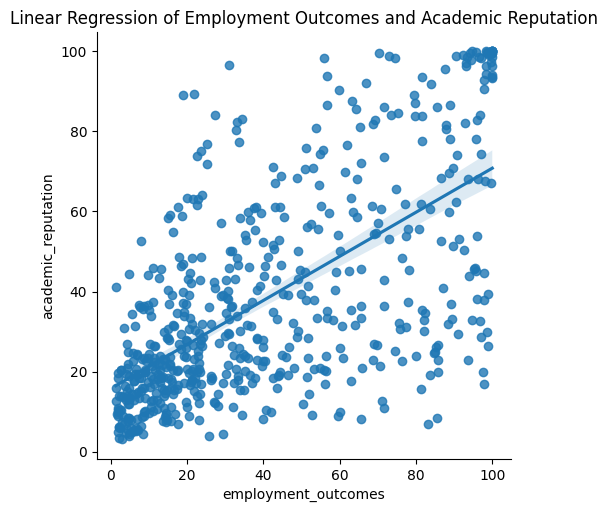

In [12]:
sns.lmplot(data=df_corr_num, x="employment_outcomes", y="academic_reputation")

#title
plt.title("Linear Regression of Employment Outcomes and Academic Reputation")

Text(0.5, 1.0, 'Linear Regression of Employer Reputation and Academic Reputation')

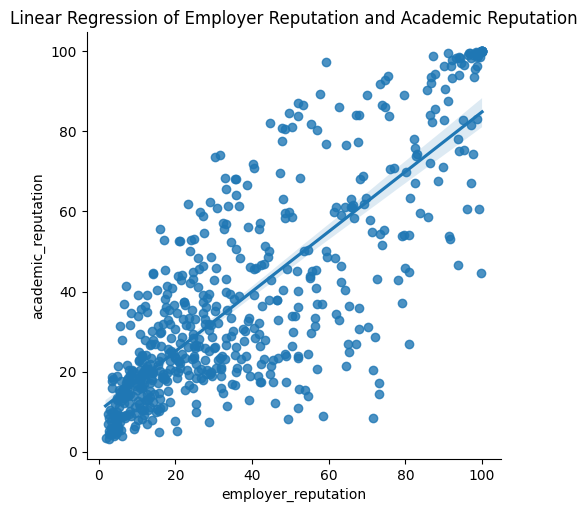

In [13]:
sns.lmplot(data=df_corr_num, x="employer_reputation", y="academic_reputation")

#title
plt.title("Linear Regression of Employer Reputation and Academic Reputation")

Text(0.5, 1.0, 'Linear Regression of Employer Reputation and Employment Outcomes')

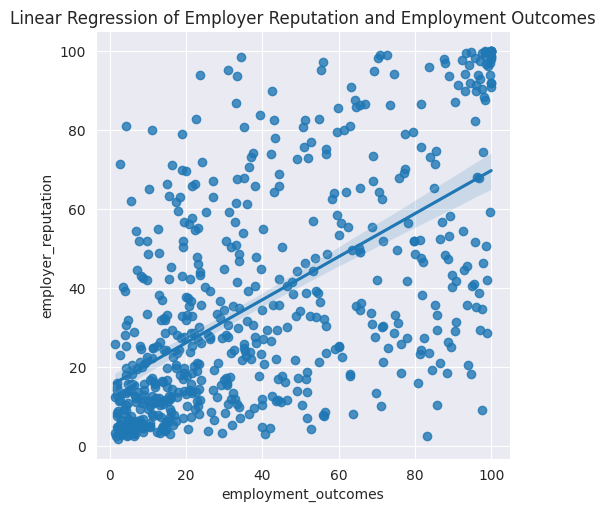

In [30]:
sns.lmplot(data=df_corr_num, x="employment_outcomes", y="employer_reputation")

#title
plt.title("Linear Regression of Employer Reputation and Employment Outcomes")

We can look at how size affects the variables of choice for this student with a parallel plot.

Text(0, 0.5, 'Score')

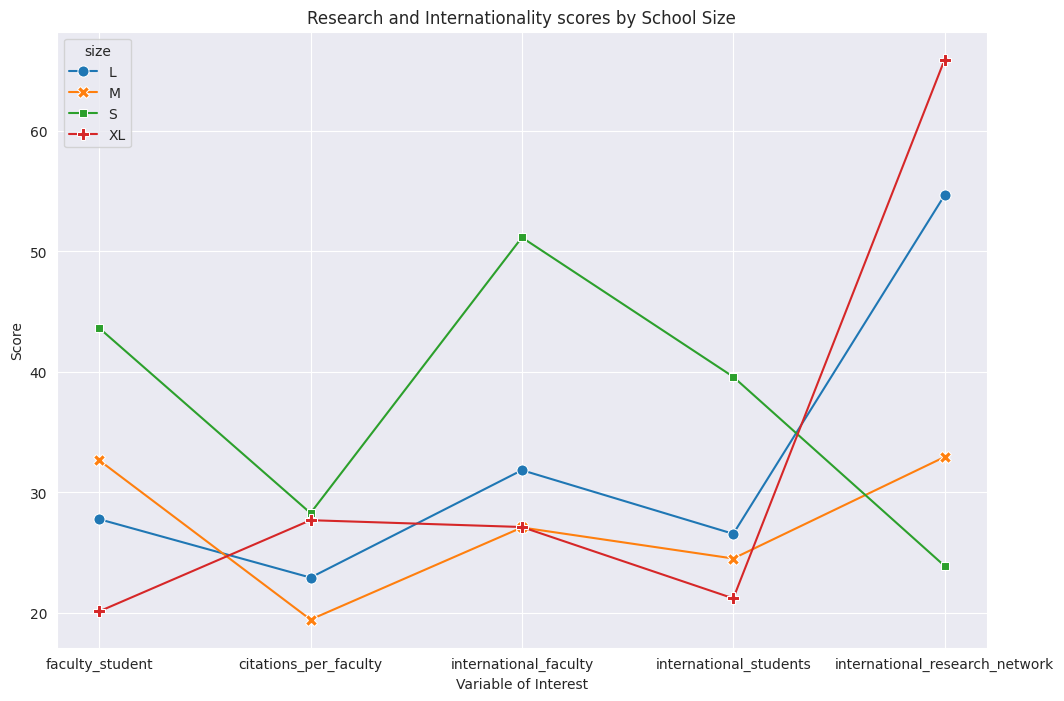

In [15]:
average_data = df.groupby('size')[['faculty_student', 'citations_per_faculty', 'international_faculty', 'international_students', 'international_research_network']].mean()
#normalized_data = (average_data - average_data.mean()) / average_data.std()

#set style
sns.set_style("darkgrid")

#create parallel plot
plt.figure(figsize=(12,8))
parallel_plot = sns.lineplot(data=average_data.transpose(),
                             dashes=False,
                             markers=True,
                             markersize=8)

#title
plt.title("Research and Internationality scores by School Size")
plt.xlabel("Variable of Interest")
plt.ylabel("Score")

Based on this visualization, we can see that small schools rank higher on the variables of interest for research interests, for faculty student relationships, and for internationality of school - except for in terms of an international research network. 

However, based on the other variables, I would recommend for this student that they choose to narrow their search to primarily small schools. 

In [16]:
# small colleges dataframe
small = ['S']
small_colleges_df = df[df['size'].isin(small)]

We can take this subset of colleges and determine what countries are best to look in for an international student and faculty population. 

In [17]:
#What countries have the most international student attendance?
#create new df with relevant variables
df_international = pd.DataFrame()
columns_intl = ['location', 'location_full', 'institution_name', 'international_faculty', 'international_students', 'international_research_network']
df_international[columns_intl] = df[columns_intl]

#filter for small colleges
small = ['S']
small_colleges_df_intl = df_international[df['size'].isin(small)]

#group by location and average each variable
#grouped_by_location_intl = small_colleges_df_intl.groupby('location').mean()

In [18]:
#Does the country you go to college in influnence your career prospects?
#create new df with relevant variables
df_career = pd.DataFrame()
columns_career = ['location', 'employer_reputation', 'citations_per_faculty', 'international_research_network', 'employment_outcomes']
df_career[columns_career] = small_colleges_df[columns_career]

#group by location and average each variable
grouped_by_location = df_career.groupby('location').mean()

In [19]:
#sort each variable in descending order
reputation = grouped_by_location.sort_values(by='employer_reputation', ascending=False)
citations = grouped_by_location.sort_values(by='citations_per_faculty', ascending=False)
research_network = grouped_by_location.sort_values(by='international_research_network', ascending=False)
employment_outcomes = grouped_by_location.sort_values(by='employment_outcomes', ascending=False)

We can first look at how country influences career outcomes outside of academia by looking at career outcomes and employer reputations.

Text(0.5, 1.0, 'Employer Reputation by Country')

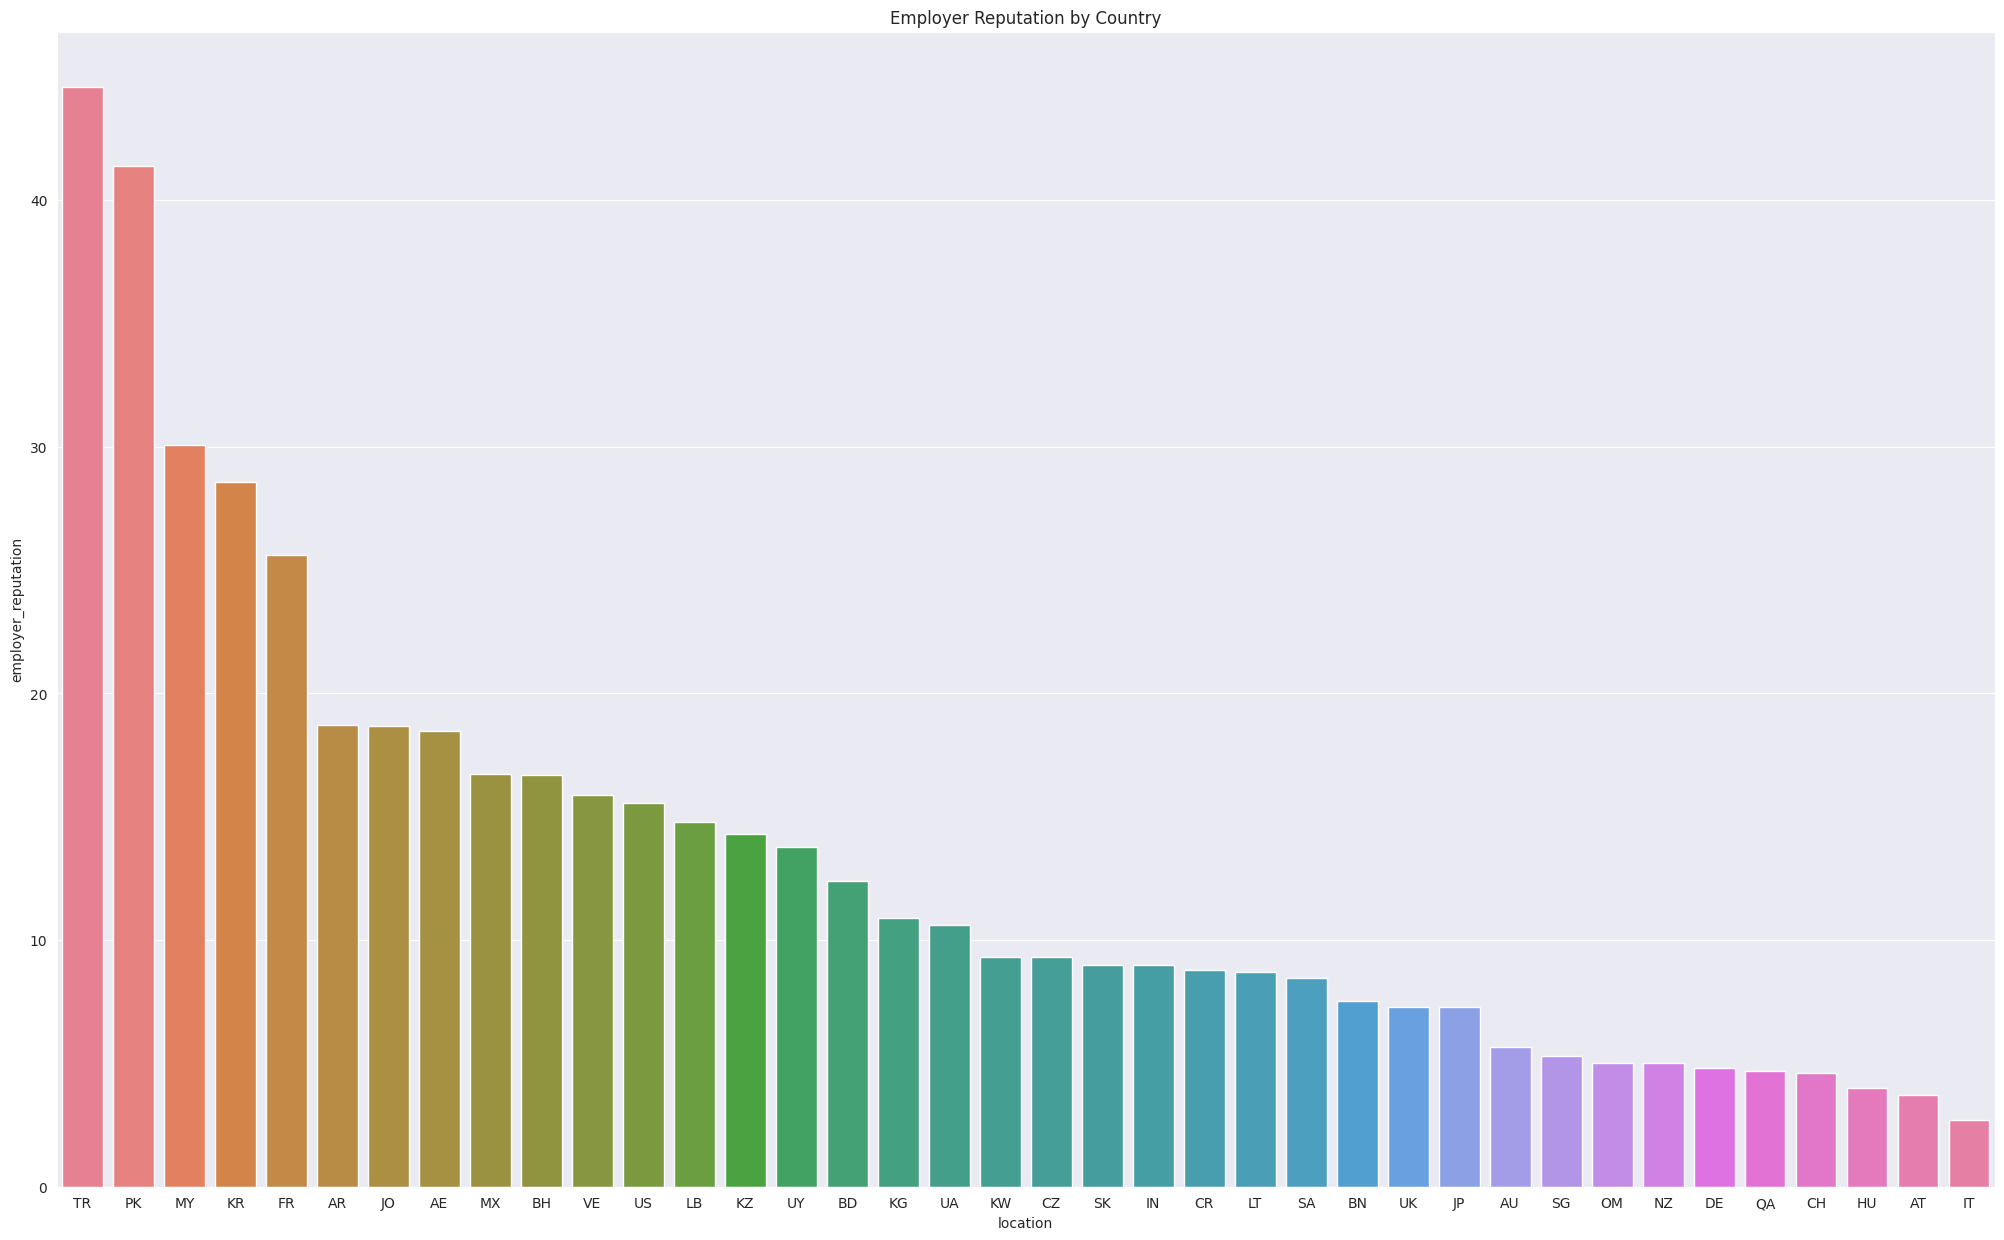

In [20]:
# plot employer reputation bar chart
#fix size so labels are readable
fig, ax = plt.subplots(figsize=(25,15))

sns.barplot(
    x="location", 
    y="employer_reputation", 
    data=reputation, 
    estimator=sum, 
    errorbar=None, 
    hue='location');

#title and axes
plt.title("Employer Reputation by Country")

Text(0.5, 1.0, 'Employer Reputation by Country')

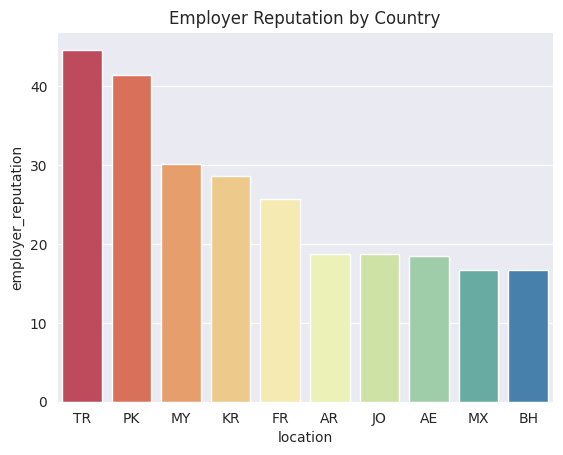

In [31]:
top_10_reputations = reputation.head(10)

#update the palette to a non sequential theme
palette = sns.color_palette("Spectral", 10)

sns.barplot(
    x="location", 
    y="employer_reputation", 
    data=top_10_reputations, 
    estimator=sum, 
    errorbar=None, 
    hue='location',
    palette=palette
)

plt.title("Employer Reputation by Country")

Text(0.5, 1.0, 'Employment Outcomes by Country')

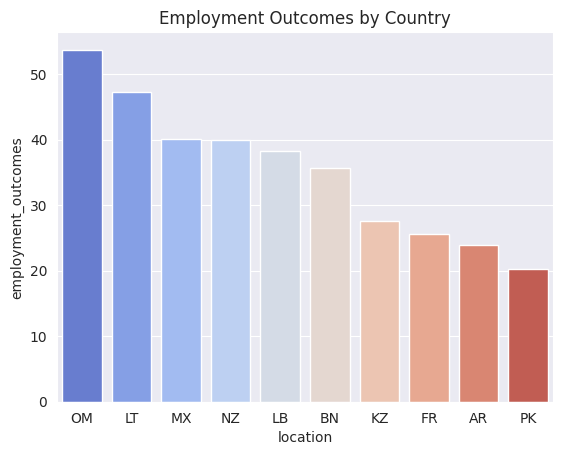

In [32]:
top_10_employment = employment_outcomes.head(10)

#update the palette to a non sequential theme
palette = sns.color_palette("coolwarm", 10)

# plot employment_outcomes bar chart
sns.barplot(
    x="location", 
    y="employment_outcomes", 
    data=top_10_employment, 
    estimator=sum, 
    errorbar=None, 
    hue='location',
    palette=palette)

plt.title("Employment Outcomes by Country")

If the student is more interested in going into research or academic work, I will do different visualizations to determine what schools might be best based on variables for the number of citations each faculty has, or how many international networking connections schools in this country generally offer. 

Text(0.5, 1.0, 'Citations Per Faculty by Country')

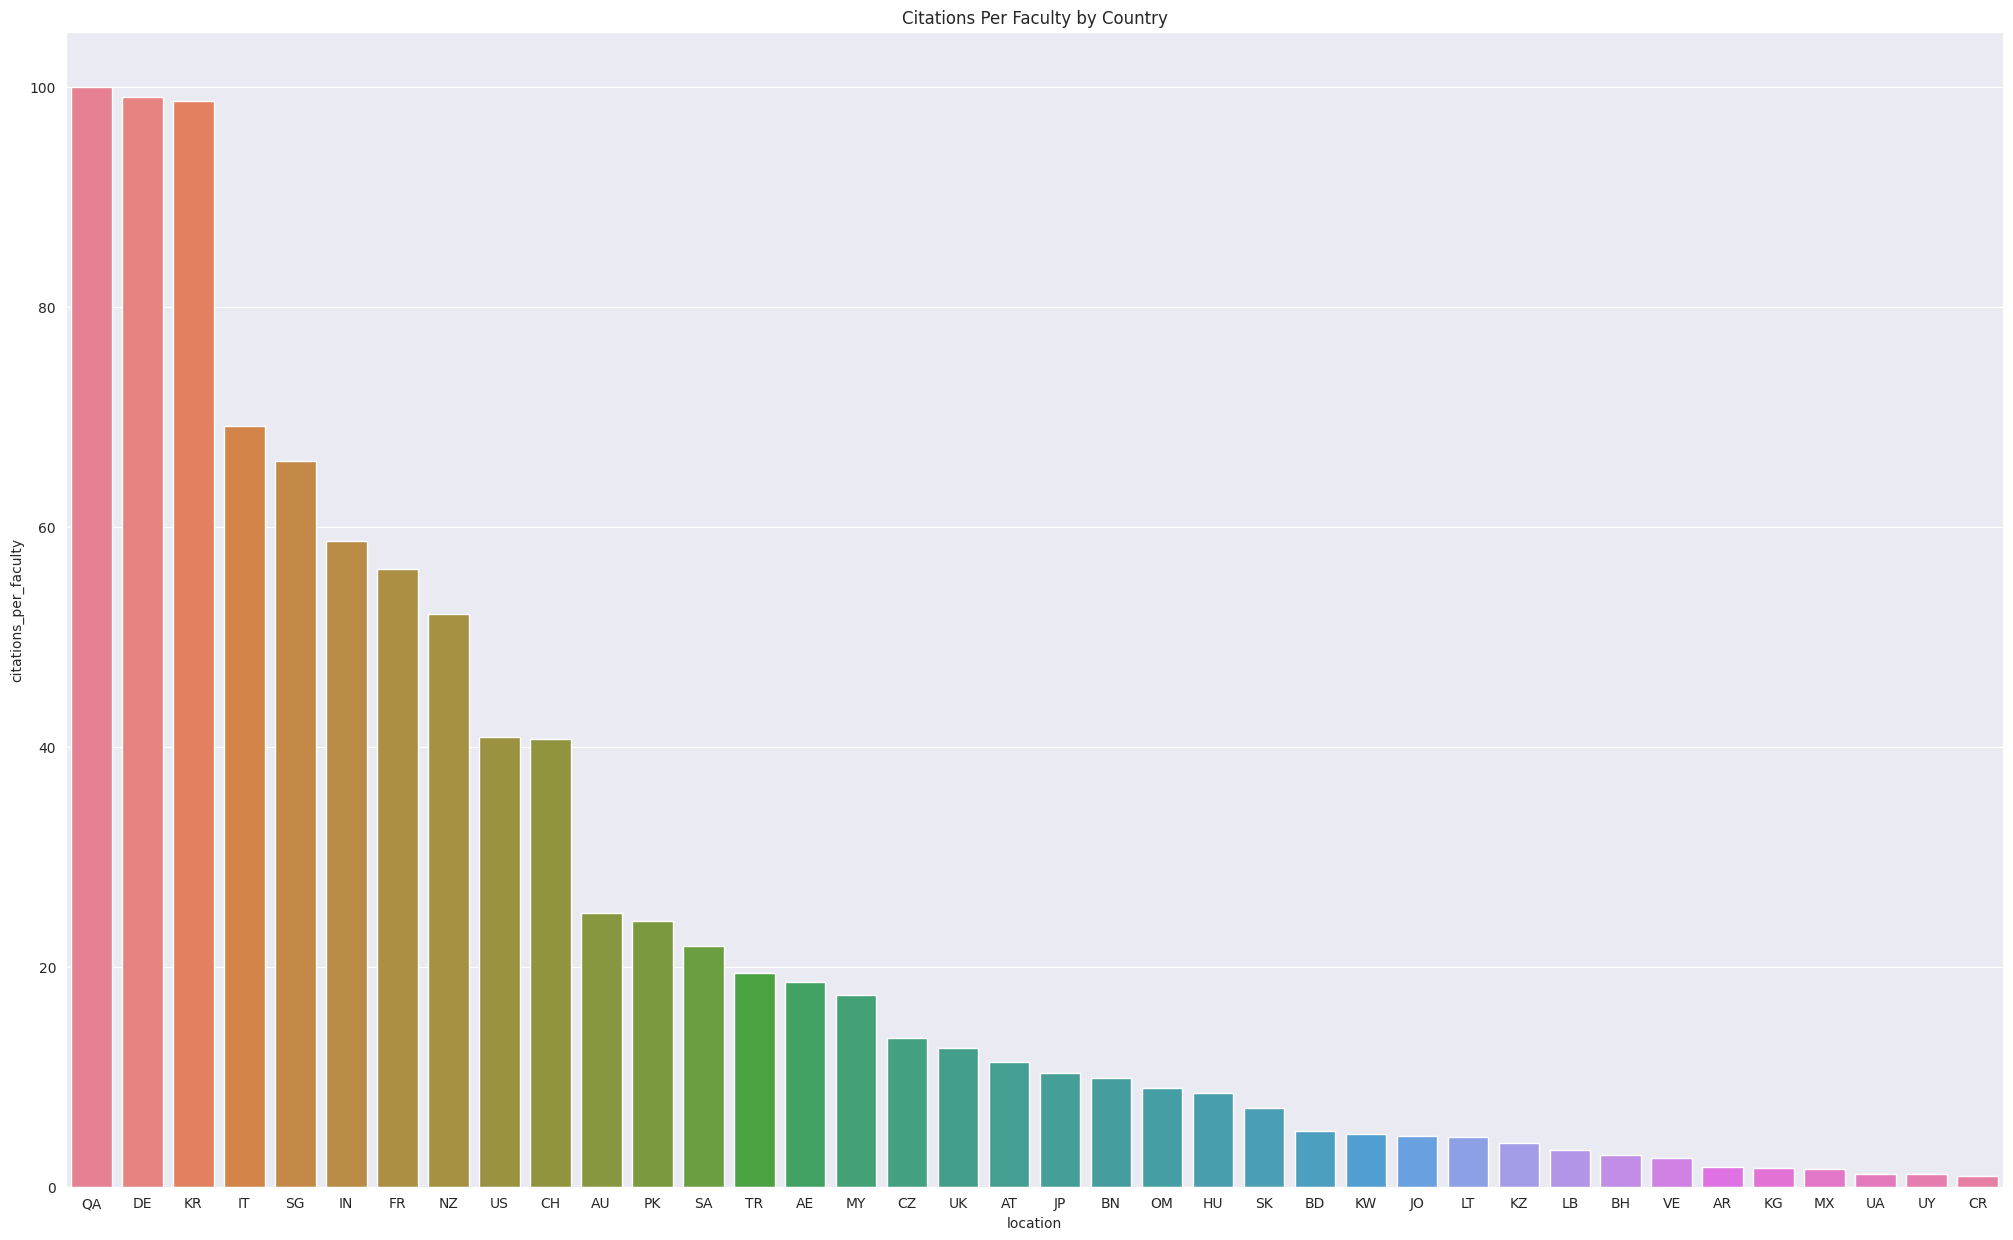

In [33]:
# plot citations_per_faculty bar chart

#fix size so labels are readable
fig, ax = plt.subplots(figsize=(25,15))

sns.barplot(
    x="location", 
    y="citations_per_faculty", 
    data=citations, 
    estimator=sum, 
    errorbar=None, 
    hue='location');

plt.title("Citations Per Faculty by Country")

Text(0.5, 1.0, 'Citations Per Faculty by Country')

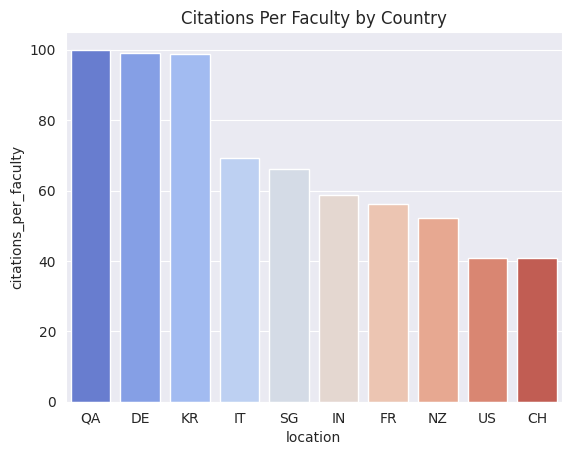

In [34]:
top_10_citations = citations.head(10)

#update the palette to a non sequential theme
palette = sns.color_palette("coolwarm", 10)

sns.barplot(
    x="location", 
    y="citations_per_faculty", 
    data=top_10_citations, 
    estimator=sum, 
    errorbar=None, 
    hue='location',
    palette=palette
)

plt.title("Citations Per Faculty by Country")

Text(0.5, 1.0, 'International Research Network by Country')

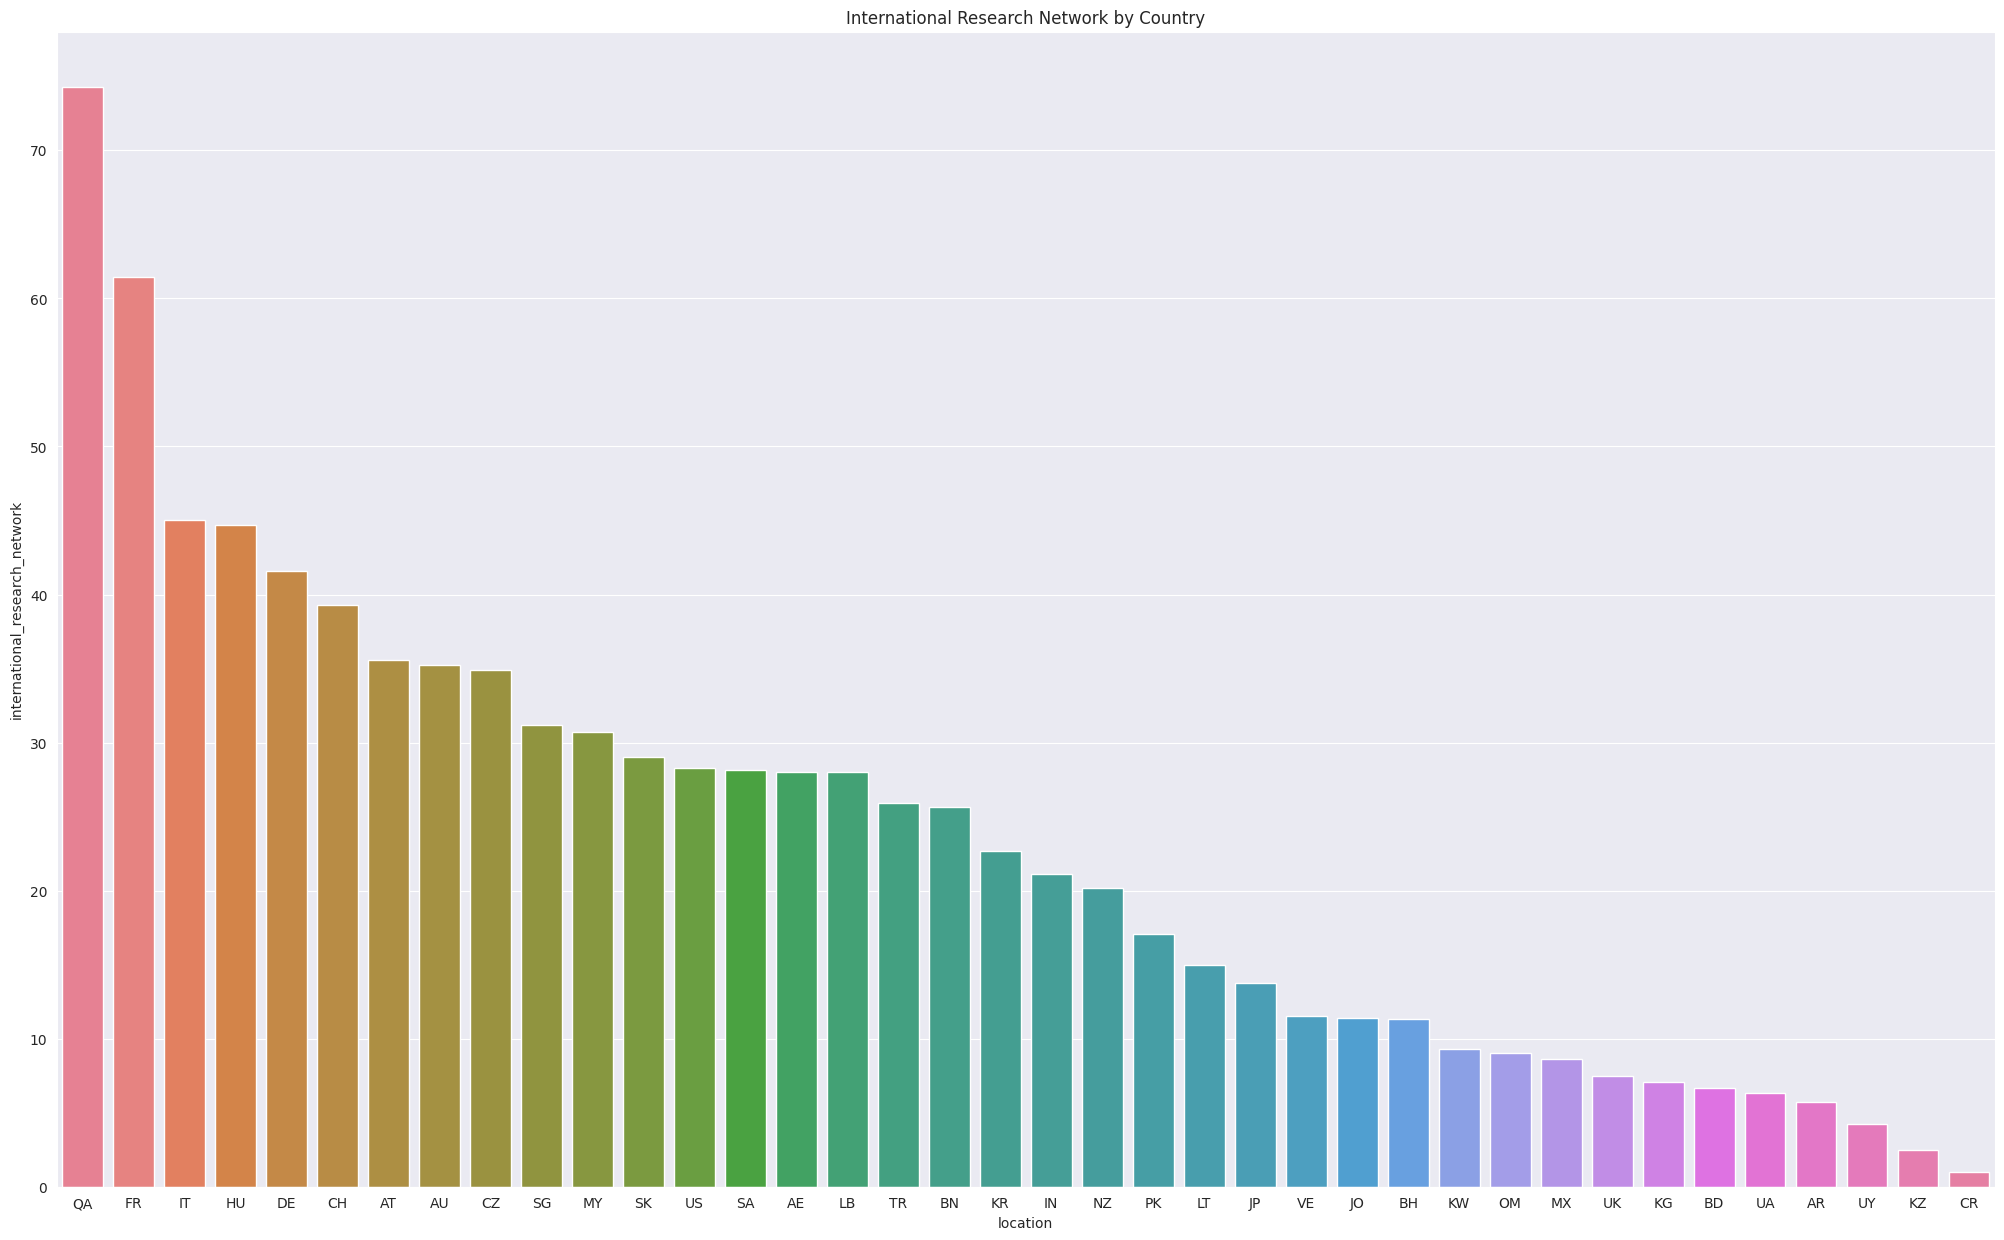

In [35]:
# plot international_research_network bar chart
#fix size so labels are readable
fig, ax = plt.subplots(figsize=(25,15))

sns.barplot(
    x="location", 
    y="international_research_network", 
    data=research_network, 
    estimator=sum, 
    errorbar=None, 
    hue='location');

plt.title("International Research Network by Country")

Now filter small by the top performing countries for these variables
QA, FR, 
QA, DE, KR
OM, LT, MX

In [26]:
top_countries_Em_Re = ['QA','FR','DE','KR','OM','LT','MX']
top_countries = small_colleges_df[df['location'].isin(top_countries_Em_Re)]
top_countries

/tmp/ipykernel_10050/3387102733.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_countries = small_colleges_df[df['location'].isin(top_countries_Em_Re)]


,2025_rank,2024_rank,institution_name,location,location_full,size,academic_reputation,employer_reputation,faculty_student,citations_per_faculty,international_faculty,international_students,international_research_network,employment_outcomes,sustainability,qs_overall_score
97,98,100,Pohang University of Science And Technology (P...,KR,South Korea,S,45.9,80.0,99.9,96.9,27.6,2.7,26.6,11.0,36.6,60.3
182,183,310,Hamad Bin Khalifa University,QA,Qatar,S,12.9,4.7,99.9,100.0,100.0,100.0,74.3,6.0,2.6,48.3
186,187,184,École Normale Supérieure de Lyon,FR,France,S,29.8,16.3,97.0,93.5,59.0,11.7,70.3,14.0,6.6,47.5
204,205,192,Ecole des Ponts ParisTech,FR,France,S,8.9,58.5,99.0,62.6,43.5,96.5,37.3,59.5,10.8,45.8
279,280,266,Ulsan National Institute of Science and Techno...,KR,South Korea,S,13.6,13.5,87.9,98.1,29.3,9.6,24.8,3.3,16.1,38
325,326,307,Daegu Gyeongbuk Institute of Science and Techn...,KR,South Korea,S,10.5,11.8,84.1,99.9,6.6,3.3,12.3,2.7,3.1,34
358,359,328,Gwangju Institute of Science and Technology (G...,KR,South Korea,S,13.8,9.0,38.6,100.0,18.6,8.8,27.0,2.2,9.9,31.9
379,380,1401+,Technische Universität Bergakademie Freiberg,DE,Germany,S,4.9,4.8,3.5,99.1,41.4,100.0,41.6,1.9,1.1,30.8
721,711-720,1201-1400,Université de Franche-Comté,FR,France,S,6.5,2.1,100.0,12.4,<NA>,<NA>,76.7,3.2,1.7,-
753,751-760,651-660,Instituto Tecnológico Autónomo de México (ITAM),MX,Mexico,S,15.2,31.0,13.9,1.6,51.0,1.4,7.7,77.1,1.0,-


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Colegio de México'),
  Text(1, 0, 'Daegu Gyeongbuk Institute of Science and Technology (DGIST)'),
  Text(2, 0, 'Ecole des Ponts ParisTech'),
  Text(3, 0, 'Gwangju Institute of Science and Technology (GIST)'),
  Text(4, 0, 'Hamad Bin Khalifa University'),
  Text(5, 0, 'Instituto Tecnológico Autónomo de México (ITAM)'),
  Text(6, 0, 'Mykolas Romeris University'),
  Text(7, 0, 'Pohang University of Science And Technology (POSTECH)'),
  Text(8, 0, 'Sohar University'),
  Text(9, 0, 'Technische Universität Bergakademie Freiberg'),
  Text(10, 0, 'Ulsan National Institute of Science and Technology (UNIST)'),
  Text(11, 0, 'Université de Franche-Comté'),
  Text(12, 0, 'École Normale Supérieure de Lyon')])

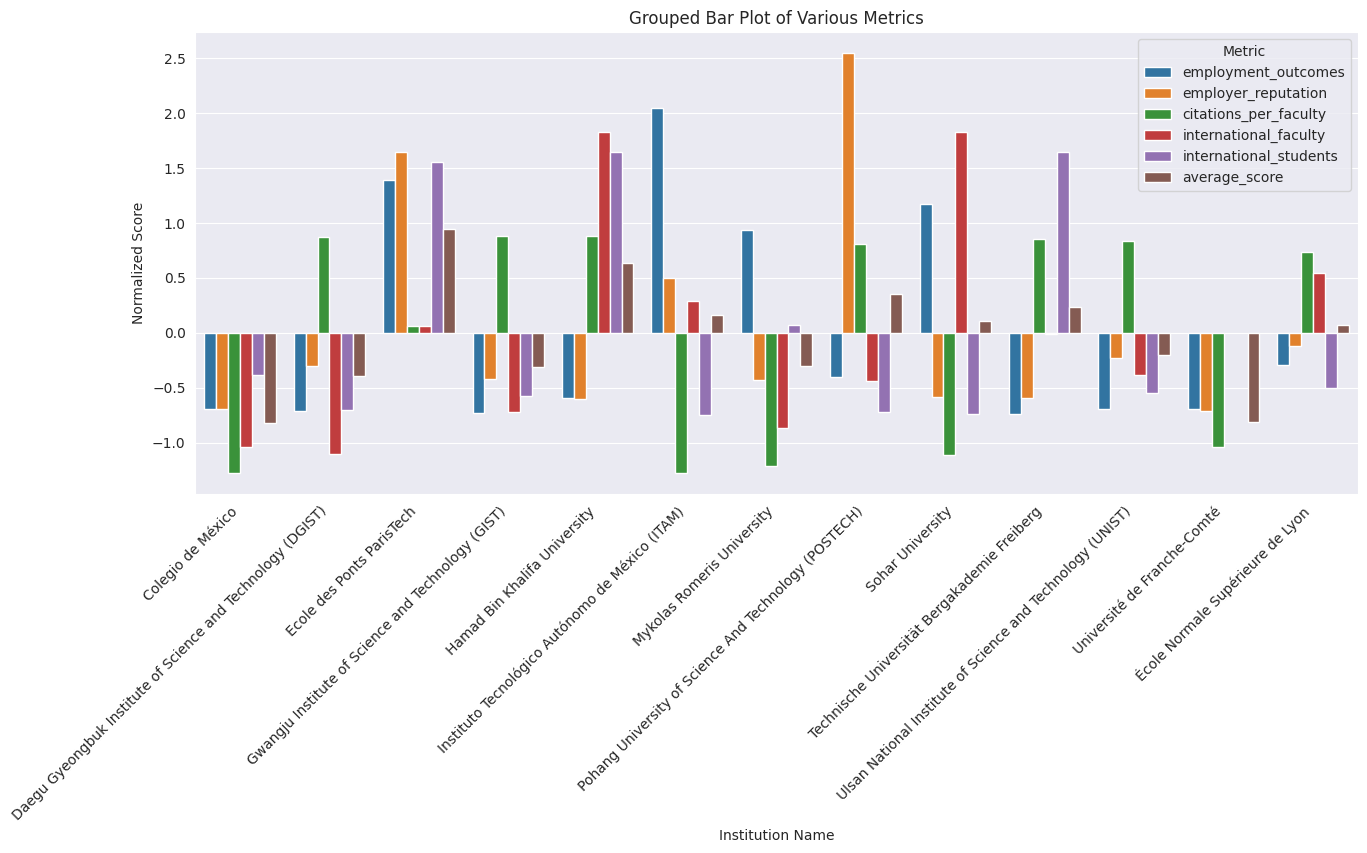

In [28]:
#shift datta orientation
long_data = normalized_data.reset_index().melt(id_vars='institution_name', var_name='Metric', value_name='Score')

#create grouped bar plot
plt.figure(figsize=(15, 6))
sns.barplot(data=long_data, x='institution_name', y='Score', hue='Metric')

# title and axes
plt.xlabel('Institution Name')
plt.ylabel('Normalized Score')
plt.title('Grouped Bar Plot of Various Metrics')
plt.xticks(rotation=45, ha='right')


We can compare the top college suggestions across variables of interest to look for any exceptional options. 

/tmp/ipykernel_10050/336797252.py:10: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(


Text(0.5, 1.0, 'Top 5 Colleges Ranked by Averaged Score of Variables of Interest')

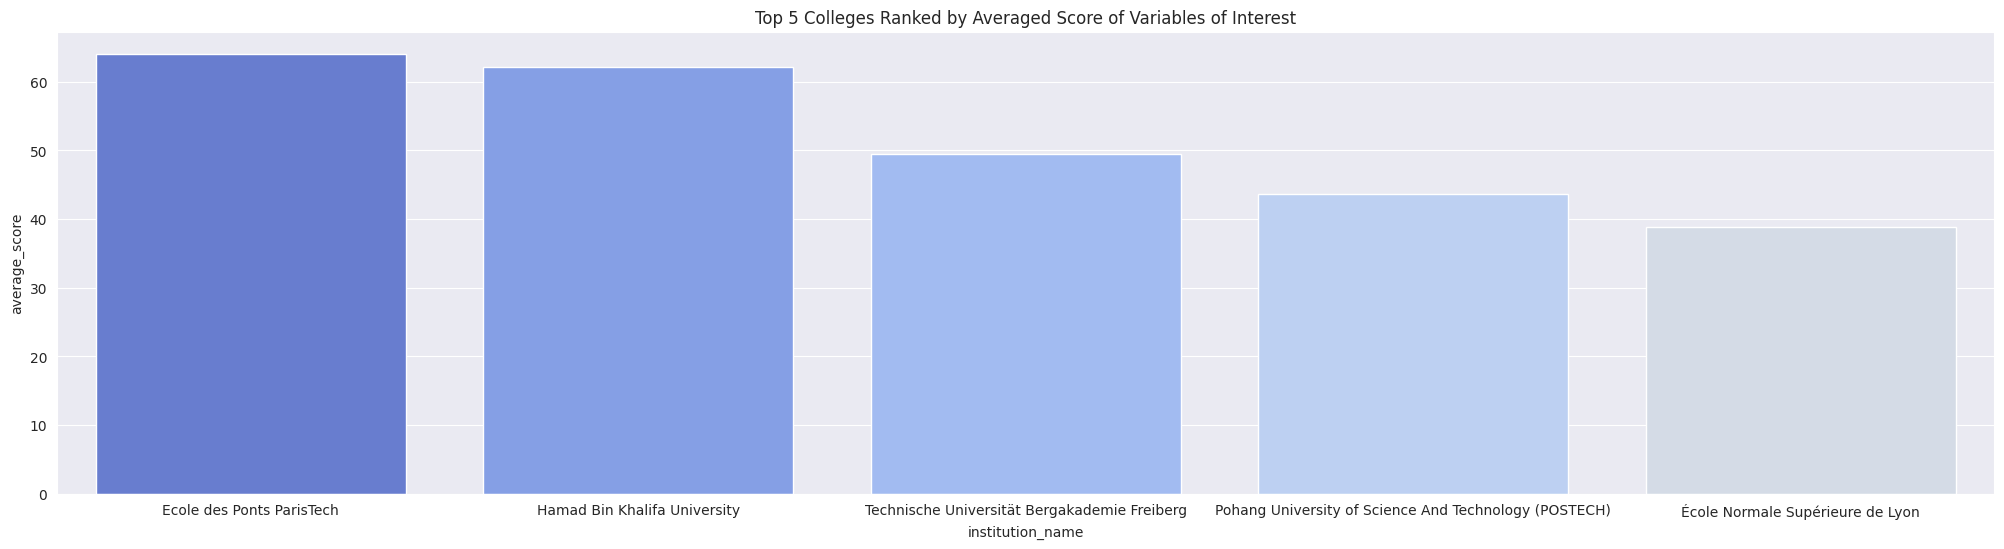

In [36]:
average_data['average_score'] = average_data.mean(axis=1)
#long_data_nonnorm = average_data.reset_index().melt(id_vars='institution_name', var_name='Metric', value_name='Score')

average_sort = average_data.sort_values(by='average_score', ascending=False)
average_sort = average_sort.head(5)

palette = sns.color_palette("coolwarm", 10)

plt.figure(figsize=(25, 6))
sns.barplot(
    x="institution_name", 
    y="average_score", 
    data=average_sort, 
    estimator=sum, 
    errorbar=None, 
    hue='institution_name',
    palette=palette)

plt.title("Top 5 Colleges Ranked by Averaged Score of Variables of Interest")

We can also take an averaged score across the variables of interest for each of these colleges to rank them in terms of fit for this student. Overall, the college I would suggest for this student would be Ecole des Ponts ParisTech.